# Classification. Linear models and KNN

In [247]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [266]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [10]:
PATH = "D:/data/"

In [11]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [12]:
data.head(100).T

PassengerId,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,1,3,3,3,1,1,2,2
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Christmann, Mr. Emil","Andreasson, Mr. Paul Edvin","Chaffee, Mr. Herbert Fuller","Dean, Mr. Bertram Frank","Coxon, Mr. Daniel","Shorney, Mr. Charles Joseph","Goldschmidt, Mr. George B","Greenfield, Mr. William Bertram","Doling, Mrs. John T (Ada Julia Bone)","Kantor, Mr. Sinai"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,male,male,male,male,male,male,male,female,male
Age,22,38,26,35,35,NaN,54,2,27,14,...,29,20,46,26,59,NaN,71,23,34,34
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,1,1,0,0,0,0,0,1
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,2,0,0,0,1,1,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,343276,347466,W.E.P. 5734,C.A. 2315,364500,374910,PC 17754,PC 17759,231919,244367
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,8.05,7.8542,61.175,20.575,7.25,8.05,34.6542,63.3583,23,26
Cabin,NaN,C85,NaN,C123,NaN,NaN,E46,NaN,NaN,NaN,...,NaN,NaN,E31,NaN,NaN,NaN,A5,D10 D12,NaN,NaN


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [400]:
print(list((data[data['Sex'] == 'female']).count())[0], 'количество женщин')
print(list((data[data['Sex'] == 'male']).count())[0], 'количество мужчин')

314 количество женщин
577 количество мужчин


< your thoughts >

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

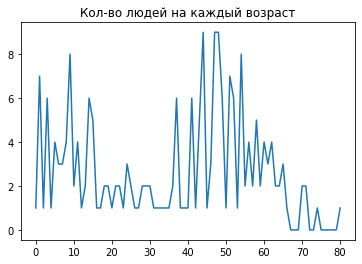

24.034122807017543 = Средний возраст выживших
23.653005464480874 = Средний возраст умерших


In [415]:
a = [0] * 81
data = data.fillna(0)
for i in range(81):
    a[i] = list(data[data['Age'] == i].count())
    q = a[i]
    a[i] = int(str(q)[1])
plt.plot(a)
plt.title('Кол-во людей на каждый возраст')
plt.show()
l = data[data['Survived'] == 1]['Age'].mean()
print(l, '= Средний возраст выживших')
d = data[data['Survived'] == 0]['Age'].mean()
print(d, '= Средний возраст умерших')

< Из за того что на Тинаке сначала пытались спасти женщин и детей >

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

216
184
491


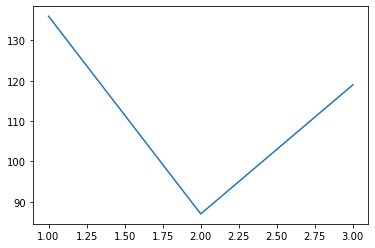

In [15]:
class1 = data[data['Pclass'] == 1]
class1a = int(str(list(class1[class1['Survived'] == 1].count()))[1:4])
class1 = int(str(list(class1[class1['Pclass'] == 1].count()))[1:4])
print(class1)
class2 = data[data['Pclass'] == 2]
class2a = int(str(list(class2[class2['Survived'] == 1].count()))[1:3])
class2 = int(str(list(class2[class2['Pclass'] == 2].count()))[1:4])
print(class2)
class3 = data[data['Pclass'] == 3]
class3a = int(str(list(class3[class3['Survived'] == 1].count()))[1:4])
class3 = int(str(list(class3[class3['Pclass'] == 3].count()))[1:4])
print(class3)
x = [1, 2, 3]
y = [class1a, class2a, class3a]
plt.plot(x, y)
plt.show()

In [16]:
< "Какой класс был «самым безопасным»?": - 1 "Есть ли связь между портом посадки и выживанием?" - Нет >

SyntaxError: invalid syntax (<ipython-input-16-ca603bcd1bd6>, line 1)

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [ ]:
a = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
b = [0] * 11
for i in range(11):
    do = data[a[i]].count()
    b[i] = do / 891 * 100
plt.plot(a, b)
plt.show()

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

< я бы взял mean(). преимущества: среднее значение не изменяется. недостатки: Мы не сможемь предсказать по этому параметру>

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [366]:
data.fillna(0)
y = data['Survived']
dat = [0] * 891
for i in range(891):
    dat[i] = [data['Pclass'][i - 1:i].fillna(0), data['Age'][i - 1:i].fillna(0),   data['SibSp'][i - 1:i].fillna(0),   data['Parch'][i - 1:i].fillna(0),   data['Fare'][i - 1:i].fillna(0)]
y, y_train, dat, dat_train = train_test_split(y, dat, test_size = 0.2)

0.6424581005586593
0.9217877094972067


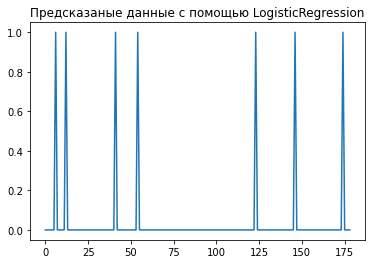

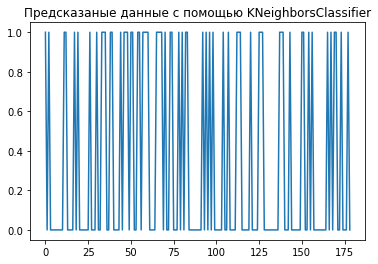

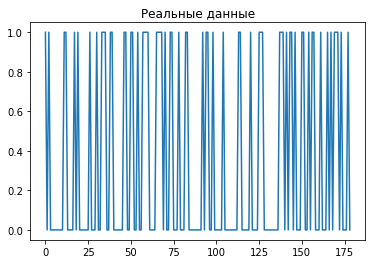

In [396]:
logic = LogisticRegression(solver='lbfgs', penalty='l2')
dat_train = np.array(dat_train)
dat_train = dat_train.reshape(dat_train.shape[:])
logic.fit(dat_train, y_train)
train_score = logic.score(dat_train, y_train)
print(train_score)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(dat_train,y_train)
train_KNN_score = model.score(dat_train,y_train)
print(train_KNN_score)
plt.plot(logic.predict(dat_train))
plt.title('Предсказаные данные с помощью LogisticRegression')
plt.show()
plt.plot(model.predict(dat_train))
plt.title('Предсказаные данные с помощью KNeighborsClassifier')
plt.show()
plt.plot(list(y_train))
plt.title('Реальные данные')
plt.show()

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [392]:
model = KNeighborsClassifier(n_neighbors=3, algorithm = 'auto')
model.fit(dat_train,y_train)
print(model.score(dat_train,y_train))
# я не совсем понял что такое f(score)

0.8212290502793296


Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.79 \leq score < 0.81,$$
$$ f(score) = 1.0, \ \ 0.81 \leq score < 0.83,$$ 
$$ f(score) = 2.5, \ \ 0.83 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

In [13]:
## your code

## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [381]:
insurance_data = pd.read_csv(os.path.join('D:/', 'myII/data/train.csv')).set_index('id')

MemoryError: Unable to allocate 223. MiB for an array with shape (49, 595212) and data type int64

In [ ]:
insurance_data.head()

Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [16]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [17]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
clf = pipeline.fit(X_train, y_train)

We'll calculate the model accuracy:

In [20]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

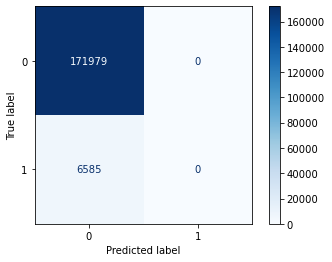

In [21]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [22]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

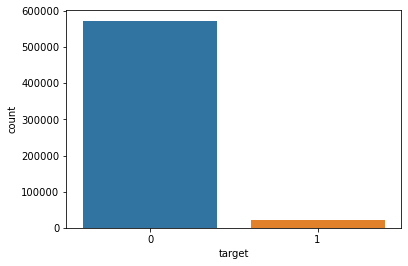

In [23]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [24]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

< your proof >

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

< your thoughts >

Let's calculate the Normalized Gini Coefficient:

In [25]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [26]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [27]:
## your code